In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

## Reading the Data from the CSV file

In [5]:
df=pd.read_csv("../csv/Bengaluru_House_Data.csv")

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [14]:
# Remove the columns which are not important
df=df.drop(["area_type", "society", "balcony", "availability"], axis="columns")

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df.shape

(13246, 5)

## Feature Engineering

In [18]:
# Applying unique function on feature called size
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df["BHK"]=df["size"].apply(lambda x:int(x.split(" ")[0]))

In [20]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [22]:
# Exploring total_sqft feature
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
# Convert the range into number

def convert_sqft_to_number(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df=df.copy()
df["total_sqft"]=df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [26]:
df=df.copy()
df["price_per_sqft"]=df["price"]*100000/df["total_sqft"]
df.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [27]:
df.location=df.location.apply(lambda x:x.strip())
location_stats=df["location"].value_counts(ascending=False)
location_stats

location
Whitefield                              535
Sarjapur  Road                          392
Electronic City                         304
Kanakpura Road                          266
Thanisandra                             236
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sector 1 HSR Layout                     10
Basapura                                10
Nagadevanahalli                         10
BTM 1st Stage                           10
Nagappa Reddy Layout                    10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1052, dtype: int64

In [30]:
df.location=df.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [31]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df[~(df.total_sqft/df.BHK<300)]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [34]:
df.shape

(13246, 7)

In [35]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [37]:
df=remove_pps_outliers(df)
df.shape

(11428, 7)

## Data Visualisation

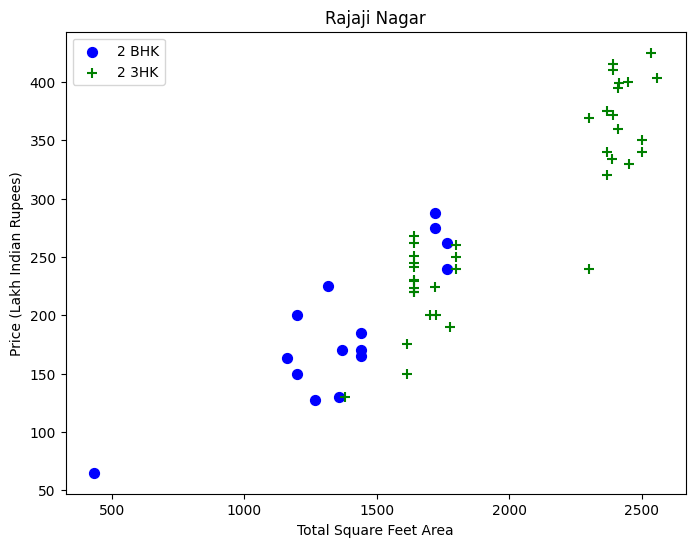

In [38]:
def plot_scatter_chart(df, location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams["figure.figsize"]=(8,6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color="green", label="2 3HK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df, "Rajaji Nagar")

Text(0, 0.5, 'Count')

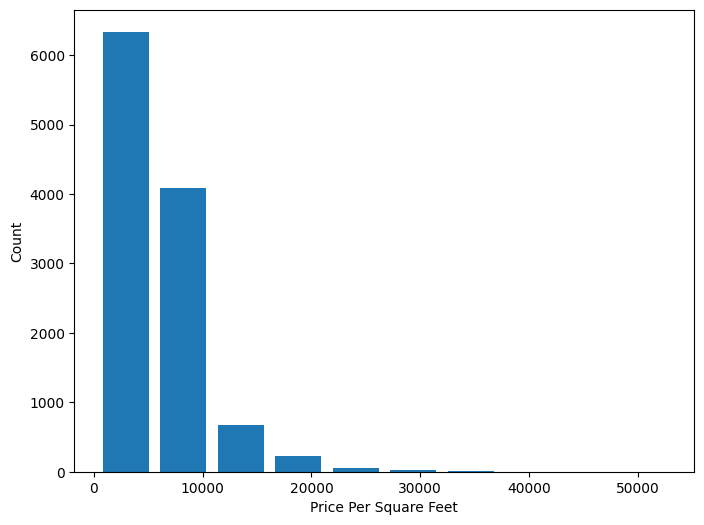

In [39]:
# Plotting the histogram for Price Per Square Feet vs Count
plt.hist(df.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

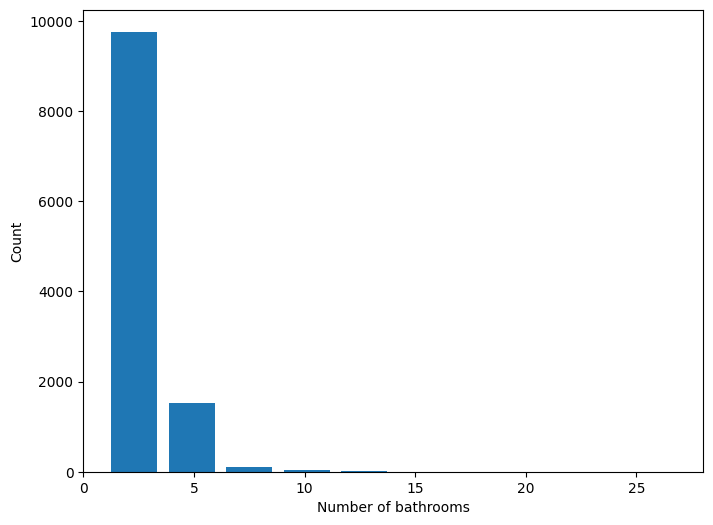

In [40]:
# Plotting the histogram for Number of Bathrooms vs Count
plt.hist(df.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df[df.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5645,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8812,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
8946,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8956,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
9007,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9238,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9294,other,19 BHK,2000.0,16.0,490.0,19,24500.000000
9346,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9631,other,14 BHK,1250.0,15.0,125.0,14,10000.000000
10280,other,11 BHK,6000.0,12.0,150.0,11,2500.000000


In [42]:
# It is unusual o have moe bathrooms than bedrooms

In [43]:
df[df.bath>df.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1635,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1771,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5604,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7229,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8812,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
9007,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9149,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
10308,other,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
10693,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
10700,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


df.head()

In [44]:
df.shape

(11428, 7)

## Using One Hot Encoding for Location

In [45]:
dummies=pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Concatinating both the dataframes together

In [46]:
df=pd.concat([df, dummies.drop("other", axis="columns")], axis="columns")
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df.drop("location", axis="columns")

,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.00,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3 BHK,1630.0,3.0,194.00,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6 BHK,1200.0,6.0,125.00,6,10416.666667,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1875.0,2.0,235.00,3,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7 Bedroom,930.0,4.0,85.00,7,9139.784946,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,1 Bedroom,812.0,1.0,26.00,1,3201.970443,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11424,3 BHK,1440.0,2.0,63.93,3,4439.583333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11425,2 BHK,1075.0,2.0,48.00,2,4465.116279,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11426,4 Bedroom,1200.0,5.0,325.00,4,27083.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
X=df.drop(["price"], axis="columns")
X.head()

,location,size,total_sqft,bath,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,6 BHK,1200.0,6.0,6,10416.666667,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3 BHK,1875.0,2.0,3,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,7,9139.784946,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
X=df.drop(["size"], axis="columns")
X.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,125.0,6,10416.666667,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,85.0,7,9139.784946,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
y=df.price
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [51]:
X=X.drop(["price_per_sqft"], axis="columns")
X.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,125.0,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,85.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
X=X.drop(["price"], axis="columns")
X.head()

,location,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
X=X.drop(["location"], axis="columns")
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,6,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,930.0,4.0,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
y.shape

(11428,)

## Test Train Split

In [56]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
x_train

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7210,2030.0,4.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1127,1615.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4573,1230.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10589,1508.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6323,1100.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1057.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5191,1505.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5390,3951.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,1510.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
lr_clf=LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.5227024431741193

In [62]:
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.3907701 , 0.5786043 , 0.54987723, 0.24846415, 0.44014709])

## Model Building

In [63]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

## Model Evaluation

In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/home/ubuntu/KV/Projects/Data_Analysis_and_Machine_Learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(96.9847866547774)

In [ ]:
df.head()